<a href="https://colab.research.google.com/github/farhanasajeer/correlation-regression/blob/main/socialCORR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data=pd.get_dummies(data)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


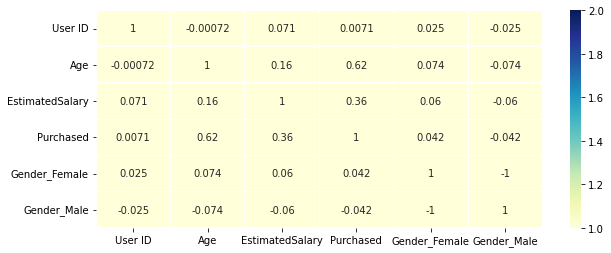

In [ ]:

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=2, vmax=1, annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
y=data['Purchased']
x=data.drop(['Purchased'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
# make linear regression model
from sklearn import linear_model
# create instance of the model
lr=linear_model.LinearRegression()
# now fitting the instance created to the training data and creating the linear regression model and store into another variable
model=lr.fit(x_train,y_train)

In [ ]:
# predict the output
predictions=model.predict(x_test)

In [ ]:
print(y_test)

209    0
280    1
33     0
210    1
93     0
      ..
314    0
373    1
380    0
239    1
75     1
Name: Purchased, Length: 100, dtype: int64


In [ ]:
print(predictions)

[ 3.65461941e-01  9.56164027e-01  8.43846582e-03  7.25110031e-01
 -4.30881171e-02  1.36722009e-01  7.32691448e-01  1.96024936e-01
  4.39915826e-01  4.33805435e-01  2.66324686e-01  6.05097319e-01
 -1.02764998e-01 -3.08156324e-01  2.34903420e-01  4.55671703e-01
  5.72224398e-01  5.65164836e-01  2.74611336e-01  7.93896216e-01
 -2.14947494e-01  1.76551876e-01  3.85727583e-01  9.18034340e-01
 -3.40196204e-01  5.04055156e-01  5.14036186e-01  2.58514263e-01
  1.01561206e+00 -3.30841481e-01  4.42907943e-01 -1.24647787e-01
  6.16168399e-01  1.62720490e-01  5.84858602e-01  3.06326013e-01
  2.88503939e-01  3.41427214e-01 -9.65272153e-02 -1.63643582e-01
  4.63633851e-01 -6.66159704e-02 -2.12221323e-01  3.78922052e-01
 -1.78930846e-01  7.98904230e-01  1.10123010e-01  1.95845925e-01
  5.02912721e-01  1.29277586e-01  8.49746551e-02  7.78664314e-01
  3.13653073e-01  8.30650947e-02  3.88674693e-01 -6.97263231e-02
  1.04274988e+00  2.64759631e-01  1.86095035e-01  2.11306712e-01
  3.54612702e-01  2.10281

In [ ]:
from sklearn.metrics import  mean_squared_error
print('MSC is:', mean_squared_error(y_test,predictions))

MSC is: 0.10660316049342869
